In [4]:
from tensorflow.keras.layers import  Input,Dense,Flatten,Conv2D,Dropout,BatchNormalization,LeakyReLU 
from tensorflow.keras.models import  Sequential
from tensorflow.keras.datasets import  fashion_mnist
import matplotlib.pyplot as  plt
import tensorflow as tf
from tensorflow.keras.optimizers import SGD


In [5]:
# load the fashio mnist datasets
data = fashion_mnist.load_data()

In [6]:
# split the data into training and testing datasets
(train_images, train_labels), (test_images, test_labels) = data

In [7]:
#normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0


In [8]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
def create_model():
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation=LeakyReLU(alpha=0.01), padding='same',name="conv1",strides=(2, 2)),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation=LeakyReLU(alpha=0.01), padding='same',name="conv2",strides=(2, 2)),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation=LeakyReLU(alpha=0.01), padding='same',name="conv3",strides=(2, 2)),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation=LeakyReLU(alpha=0.01), padding='same',name="conv4",strides=(2, 2)),
        BatchNormalization(),
        Flatten(),
        Dense(128, activation=LeakyReLU(alpha=0.01)),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    return model

In [10]:
model = create_model()
sgd = SGD(learning_rate=0.01, momentum=0.7)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/home/safal/pattern_recognition/tf_gpu/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
I0000 00:00:1745513137.911419   33821 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1145 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,250 (1.99 MB)

 Trainable params: 521,290 (1.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [12]:
model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15


I0000 00:00:1745513142.930729   35685 service.cc:152] XLA service 0x7efde0011d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745513142.930775   35685 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-04-24 16:45:43.028808: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745513143.152017   35685 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-24 16:45:45.190272: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1362', 604 bytes spill stores, 512 bytes spill loads

2025-04-24 16:45:45.269234: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fus

 26/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4364 - loss: 1.9294

I0000 00:00:1745513149.596511   35685 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7501 - loss: 0.7294 - val_accuracy: 0.8662 - val_loss: 0.3609
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8630 - loss: 0.3806 - val_accuracy: 0.8785 - val_loss: 0.3268
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8817 - loss: 0.3213 - val_accuracy: 0.8846 - val_loss: 0.3125
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8971 - loss: 0.2827 - val_accuracy: 0.8940 - val_loss: 0.2858
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9095 - loss: 0.2467 - val_accuracy: 0.8991 - val_loss: 0.2733
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9152 - loss: 0.2255 - val_accuracy: 0.8948 - val_loss: 0.2808
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9243 - loss: 0.2068 - val_accuracy: 0.8999 - val_loss: 0.2762
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9281 - loss: 0.1924 - val_accuracy: 0.8983 - val

In [13]:
# get the validation loss and accuracy
history = model.history.history
val_loss = history['val_loss']
val_accuracy = history['val_accuracy']
# get the training loss and accuracy
train_loss = history['loss']
train_accuracy = history['accuracy']


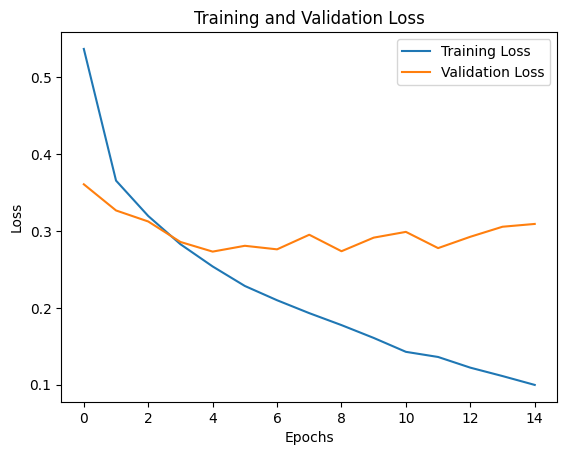

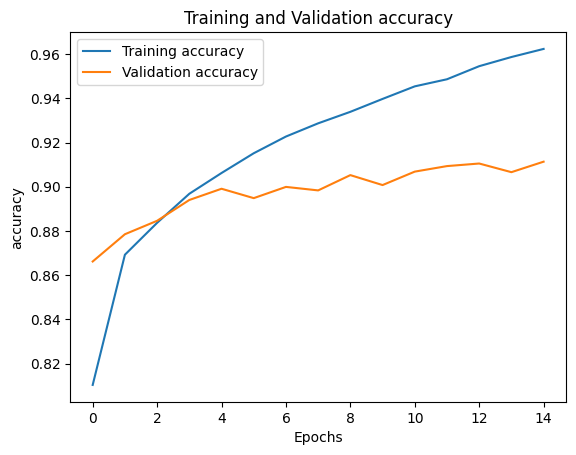

In [14]:
def plot_loss(history):
    # plot the training and validation loss
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy(history):
    plt.plot(history['accuracy'], label='Training accuracy')
    plt.plot(history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()


plot_loss(history)
plot_accuracy(history)

In [16]:
# evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9058 - loss: 0.3608
Test accuracy: 0.9053000211715698


In [17]:
# predict the test dataset
predictions = model.predict(test_images)
predictions.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


(10000, 10)

In [18]:
import tensorflow as tf
confusion_matrix = tf.math.confusion_matrix(test_labels, tf.argmax(predictions, axis=1))


<Axes: >

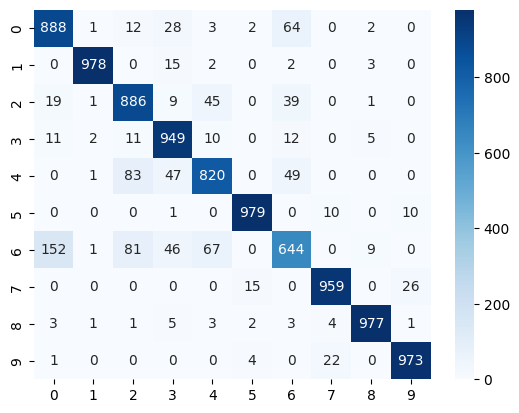

In [19]:
import seaborn as sns

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

In [20]:
# first conv layer
new_model = tf.keras.Model(inputs=model.layers[0].input, outputs=model.layers[0].output)

In [21]:
# predict on the first 10 images
activations = new_model.predict(test_images[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


In [22]:
def visualize_extracted_features(activation, layer_name, max_filters=6):
    print(f"{layer_name} activation shape: {activation.shape}")  # Debug info
    fig, axes = plt.subplots(1, max_filters, figsize=(20, 5))
    fig.suptitle(f'Feature maps from {layer_name}', fontsize=16)

    for i in range(max_filters):
        ax = axes[i]
        
        try:
            if activation.ndim == 4:  # (batch, height, width, channels)
                ax.imshow(activation[0, :, :, i], cmap='grey')
            elif activation.ndim == 3:  # (height, width, channels)
                ax.imshow(activation[:, :, i], cmap='grey')
            elif activation.ndim == 2:  # (channels, features)
                ax.imshow(activation[i, :].reshape(1, -1), cmap='grey')
            else:
                ax.text(0.5, 0.5, 'Unsupported shape', ha='center')
        except IndexError:
            ax.text(0.5, 0.5, f'Index {i} out of bounds', ha='center')

        ax.axis('off')
    
    plt.tight_layout()
    plt.show()


conv1 activation shape: (14, 14, 32)


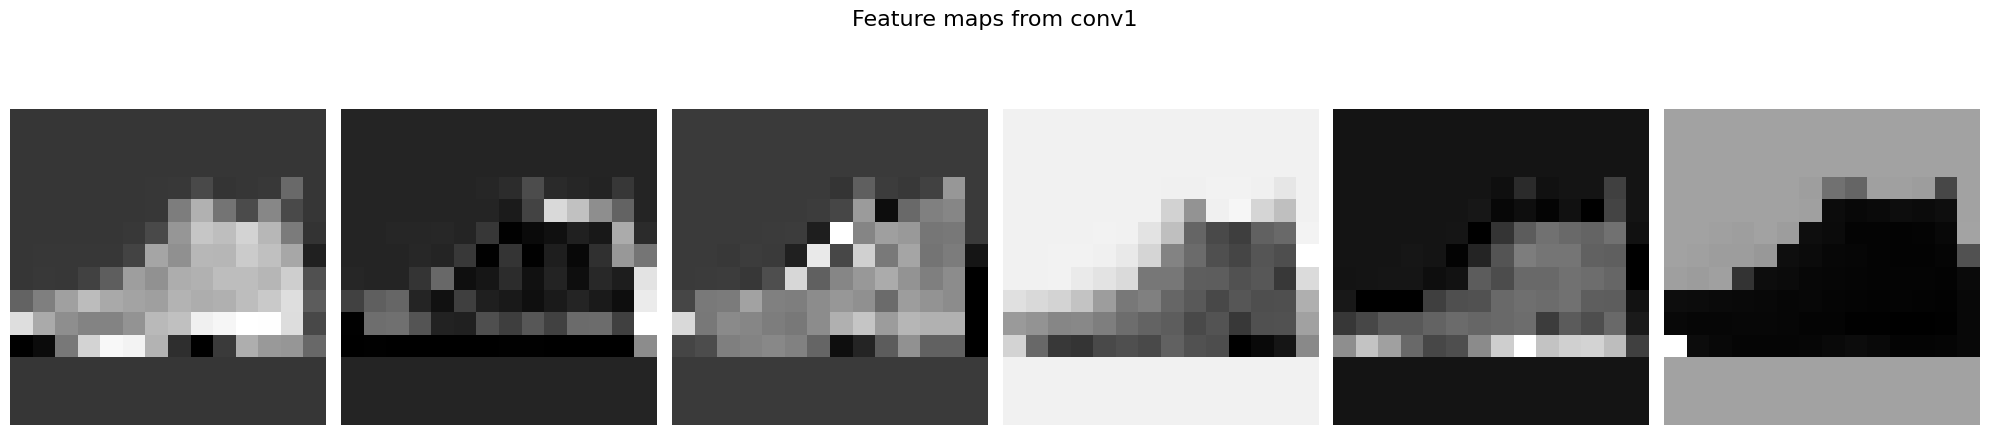

In [23]:
for layer_activation, layer in zip(activations, model.layers):
    visualize_extracted_features(layer_activation, layer.name, max_filters=6)


In [24]:

# Create a new model that outputs the activations of the conv2 layers
conv2_model = tf.keras.Model(inputs=model.layers[0].input, outputs=[layer.output for layer in model.layers if 'conv2' in layer.name])

In [25]:
conv2_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 7, 7, 64)       │        18,496 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,944 (74.00 KB)

 Trainable params: 18,880 (73.75 KB)

 Non-trainable params: 64 (256.00 B)

In [26]:
# predict on the first 10 images
activations_2 = conv2_model.predict(test_images[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


input_layer activation shape: (7, 7, 64)


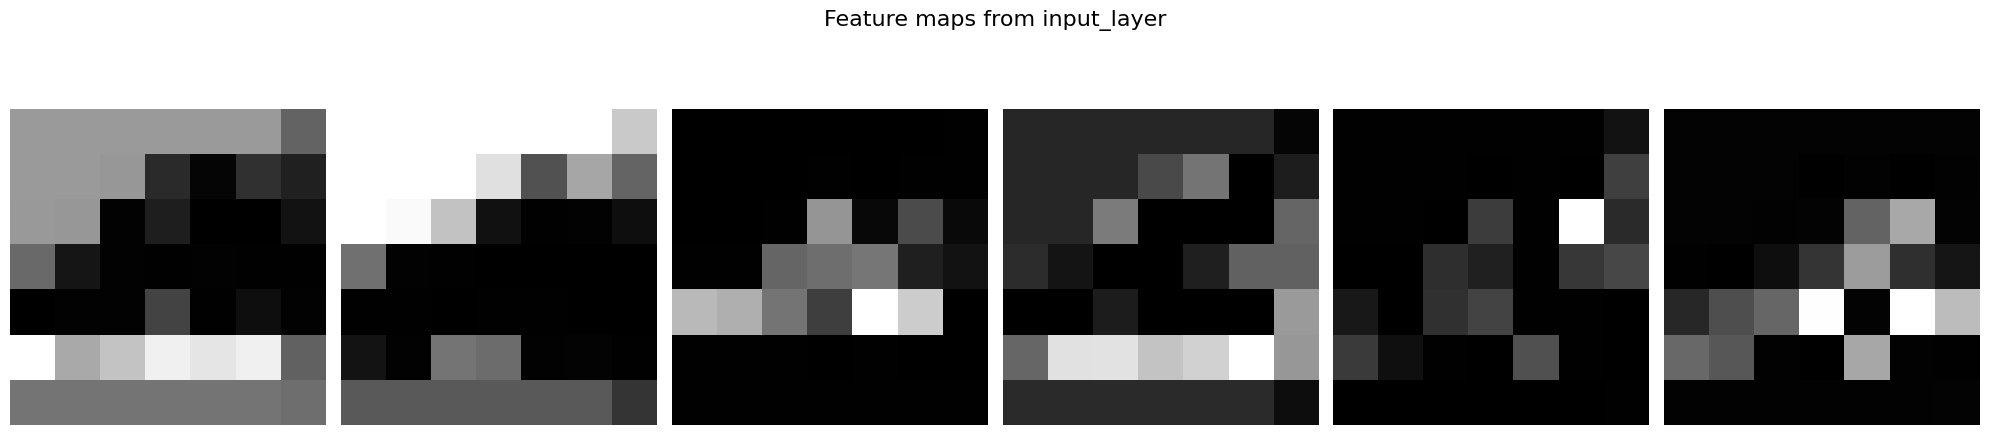

In [27]:
for layer_activation, layer in zip(activations_2, conv2_model.layers):
        visualize_extracted_features(layer_activation, layer.name, max_filters=6)
